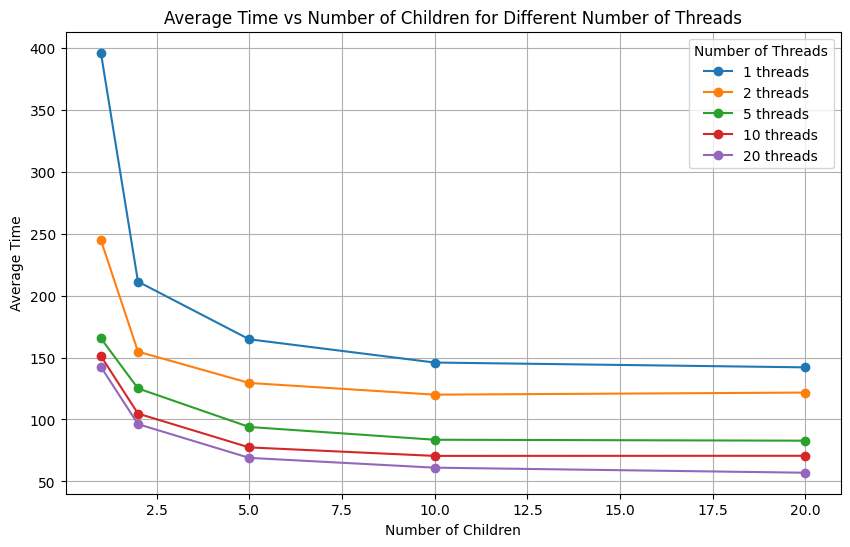

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('all.csv')

# Calculate the average time for each combination of num_children and num_threads
average_times = data.groupby(['num_children', 'num_threads']).mean().reset_index()

# Pivot the data for easier plotting
pivot_table = average_times.pivot(index='num_children', columns='num_threads', values='time')

# Plot the data
plt.figure(figsize=(10, 6))
for num_threads in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[num_threads], marker='o', label=f'{num_threads} threads')

plt.xlabel('Number of Children')
plt.ylabel('Average Time')
plt.title('Average Time vs Number of Children for Different Number of Threads')
plt.legend(title='Number of Threads')
plt.grid(True)
plt.show()

# Pivot the data for easier plotting
pivot_table = average_times.pivot(index='num_threads', columns='num_children', values='time')

# Plot the data
plt.figure(figsize=(10, 6))
for num_children in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[num_children], marker='o', label=f'{num_children} children')

plt.xlabel('Number of Threads')
plt.ylabel('Average Time')
plt.title('Average Time vs Number of Threads for Different Number of Children')
plt.legend(title='Number of Children')
plt.grid(True)
plt.show()

In [ ]:
def write_unique_combinations_to_csv(data, output_filename):
    # Drop duplicate combinations of num_children and num_threads
    unique_combinations = data.drop_duplicates(subset=['num_children', 'num_threads'])
    
    # Write the unique combinations to a new CSV file
    unique_combinations.to_csv(output_filename, index=False)

# Call the function with the loaded data and desired output filename
write_unique_combinations_to_csv(data, 'all_unique.csv')